<a href="https://colab.research.google.com/github/galenos-project/literature-mining/blob/main/topics_copy_AH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Quick pyLDAVis

In [11]:
pip install pymed

In [14]:
from pymed import PubMed
import pandas as pd

In [16]:
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim as gensimvis

In [17]:
from gensim.corpora.dictionary import Dictionary
from gensim import models
from gensim.utils import simple_preprocess

In [18]:
pyLDAvis.enable_notebook()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [19]:
#PubMed Search string and results

pubmed = PubMed(tool="PubMedSearcher", email="avahomiar@gmail.com")

search_term = "(((mood) OR (depress*) OR (affective disorder)) OR ((psychosis) OR (schizo*) OR (psychotic))) AND ((psychedelic) OR (hallucinogen) OR (entheogen) OR (hallucinogenic) OR (psychotropic)) AND (2014/2024[Date - Publication])"
results = pubmed.query(search_term)
articleList = []
articleInfo = []

for article in results:
    articleDict = article.toDict()
    articleList.append(articleDict)

for article in articleList:
    pubmedId = article['pubmed_id'].partition('\n')[0]
    articleInfo.append({
        u'pubmed_id': pubmedId,
        u'title': article['title'],
        u'abstract': article['abstract'],})

    # keywords available
    if 'keywords' in article:
        articleInfo[-1]['keywords'] = article['keywords']

articlesPD = pd.DataFrame.from_dict(articleInfo)
export_csv = articlesPD.to_csv(r'C:\Users\ahomiar\OneDrive - Nexus365\Desktop\export_dataframe.csv', index=None, header=True)

print(articlesPD.head())

  pubmed_id                                              title  \
0  27793241  Seizure due to multiple drugs intoxication: a ...   
1  25529756  Efficacy of ranitidine in olanzapine-induced w...   
2  25148542  Characterization and evaluation of self-nanoem...   
3  27136907  Pharmacokinetic profile after multiple deltoid...   
4  26706484  Pregabalin Treatment of a Patient With Complex...   

                                            abstract  \
0  The mechanism of the antidepressant effect of ...   
1  Weight gain has long been recognized as a side...   
2  The purpose of this work was to develop self-n...   
3  Paliperidone palmitate (PP) is a once-monthly ...   
4  Complex regional pain syndrome (CRPS) is a pai...   

                                            keywords  
0  [Bupripion, Bupropiona, Convulsão, Intensive c...  
1              [olanzapine, ranitidine, weight gain]  
2  [Bioavailability enhancement, food effect, sel...  
3  [atypical long-acting injectable, deltoid a

In [22]:
search_term = "(((mood) OR (depress*) OR (affective disorder)) OR ((psychosis) OR (schizo*) OR (psychotic))) AND ((psychedelic) OR (hallucinogen) OR (entheogen) OR (hallucinogenic) OR (psychotropic)) AND (2014/2024[Date - Publication])"
results = pubmed.query(search_term)
articleList = []
articleInfo = []
corpus = ""

for article in results:
    articleDict = article.toDict()

    # Combine title, abstract, and keywords into one text
    text = f"{articleDict['title']}\n{articleDict.get('abstract', '')}\n{' '.join(articleDict.get('keywords', []))}"

    # Append text to corpus
    corpus += text + "\n"

    articleDict['text'] = text
    articleList.append(articleDict)

    # Extract title and abstract, with empty strings as default values if they don't exist
    title = articleDict.get('title', '')
    abstract = articleDict.get('abstract', '')

    # Append title and abstract to article dictionary
    articleDict['title'] = title
    articleDict['abstract'] = abstract

    # Append modified article dictionary to article list
    articleList.append(articleDict)

articlesPD = pd.DataFrame.from_dict(articleList)
export_csv = articlesPD.to_csv(r'C:\Users\ahomiar\OneDrive - Nexus365\Desktop\export_dataframe.csv', index=None, header=True)

print(corpus)

# Convert corpus to dataframe
corpus_df = pd.DataFrame({'Text': corpus.split('\n')})

# Define file path for saving the output
output_file = '/content/corpus.tsv'

# Export the DataFrame to a .tsv file
corpus_df.to_csv(output_file, sep='\t', index=False)

print(f"Corpus saved to '{output_file}'")

# Convert corpus to DataFrame
corpus_df = pd.DataFrame({'Text': corpus.split('\n')})

# Define file path for saving the output in the Google Colab directory
output_file = '/content/corpus.tsv'

# Export the DataFrame to a .tsv file
corpus_df.to_csv(output_file, sep='\t', index=False)

# Export the DataFrame to a .tsv file
articlesPD.to_csv(output_file, sep='\t', index=False)

print(f"Corpus saved to '{output_file}'")


Seizure due to multiple drugs intoxication: a case report.
The mechanism of the antidepressant effect of bupropion is not fully understood. Besides, using it in the treatment of depression, it is found to be effective in reducing withdrawal symptoms due to smoking cessation. A 28-year-old female patient with a history of depression was admitted to emergency department an hour after ingestion of bupropion, quetiapine, and levothyroxine in high doses to commit suicide. While accepting her into the Intensive Care Unit, she was awake, alert, disoriented and agitated. After 2h, the patient had a generalized tonic-clonic seizure. The necessary treatment was given and 9h later with hemodynamic improvement, the patients' mental status improved. Bupropion may cause unusual behaviors such as delusions, paranoia, hallucinations, or confusion. The risk of seizure is strongly dose-dependent. We want to emphasize the importance of early gastric lavage and administration of activated charcoal.
Buprip

In [23]:
# Read corpus from TSV file
df = pd.read_csv('/content/corpus.tsv', sep='\t')

# Combine title and abstract into one text
df["alltext"] = df["title"].astype(str) + '. ' + df["abstract"].astype(str)

# Tokenize text
doc_tokenized = [simple_preprocess(doc) for doc in df['alltext']]

# Create dictionary and filter extremes
dictionary = Dictionary(doc_tokenized)
dictionary.filter_extremes(no_below=10, no_above=0.50)

# Create bag-of-words corpus
corpus = [dictionary.doc2bow(text) for text in doc_tokenized]

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Define number of topics
num_topics = 20

# Train LDA model
ldamodel = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, random_state=0)

# Visualize topics
lda_vis = gensimvis.prepare(ldamodel, corpus, dictionary, sort_topics=True)

# Save visualization as HTML
pyLDAvis.save_html(lda_vis, './lda_quick.html')

# Display or save visualization
lda_vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.151618  0.014961       1        1  15.682494
14    -0.092725  0.007113       2        1  15.189757
18    -0.111189  0.065047       3        1   7.466645
9     -0.036893 -0.004230       4        1   7.436898
5      0.120400  0.017166       5        1   6.673139
19    -0.090410 -0.004675       6        1   6.338220
16     0.140384 -0.015614       7        1   5.083946
0     -0.053426 -0.029767       8        1   4.934192
6      0.033846  0.033815       9        1   4.268748
3     -0.144580  0.122947      10        1   4.248187
13     0.121741  0.026926      11        1   3.282084
10    -0.031206 -0.147736      12        1   3.151621
1      0.156579 -0.003553      13        1   3.014468
7     -0.107382 -0.028178      14        1   2.557173
8     -0.085378  0.001481      15        1   2.553579
11     0.010511 -0.006770      16        1   2.521298
15     0.068541 -0.032905      17        1   2.295644
12    -0.106413 -0.061196      18        1   1.718863
17    -0.031313 -0.015609      19        1   1.521264
2      0.087294  0.060778      20        1   0.061780, topic_info=         Term        Freq       Total Category  logprob  loglift
232        de  404.000000  404.000000  Default  30.0000  30.0000
370        la  215.000000  215.000000  Default  29.0000  29.0000
366        en   99.000000   99.000000  Default  28.0000  28.0000
373       les   83.000000   83.000000  Default  27.0000  27.0000
32   patients  270.000000  270.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
30         or    0.076010  142.517914  Topic20  -4.8170  -0.1470
38        was    0.086123  285.028184  Topic20  -4.6921  -0.7152
15     effect    0.068497  100.902311  Topic20  -4.9211   0.0942
106       are    0.062164   95.124175  Topic20  -5.0181   0.0562
39         we    0.060992   70.239878  Topic20  -5.0371   0.3404

[1079 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
294       1  0.232532  ability
294       2  0.077511  ability
294       3  0.155022  ability
294       4  0.077511  ability
294       5  0.077511  ability
...     ...       ...      ...
399       5  0.246400     être
399       7  0.123200     être
399       9  0.061600     être
399      11  0.061600     être
399      13  0.061600     être

[4013 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 15, 19, 10, 6, 20, 17, 1, 7, 4, 14, 11, 2, 8, 9, 12, 16, 13, 18, 3])

### LDAVis from a medium article (takes longer)

In [25]:
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
#import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load English stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Define preprocessing function
def preprocess_text(text):
    # Remove Emails
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove new line characters
    text = re.sub(r'\s+', ' ', text)
    # Remove distracting single quotes
    text = re.sub(r"\'", "", text)
    return text

# Define search term and query PubMed
search_term = "(((mood) OR (depress*) OR (affective disorder)) OR ((psychosis) OR (schizo*) OR (psychotic))) AND ((psychedelic) OR (hallucinogen) OR (entheogen) OR (hallucinogenic) OR (psychotropic)) AND (2014/2024[Date - Publication])"
results = pubmed.query(search_term)

# Initialize empty list to store article dictionaries
articleList = []

# Initialize spacy ‘en’ model, keeping only tagger component (for efficiency)
# Run in terminal: python -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Iterate through search results
for article in results:
    articleDict = article.toDict()

    # Extract title and abstract, with empty strings as default values if they don't exist
    title = articleDict.get('title', '')
    abstract = articleDict.get('abstract', '')

    # Check if title and abstract are strings
    if isinstance(title, str):
        title = preprocess_text(title)
    if isinstance(abstract, str):
        abstract = preprocess_text(abstract)

    # Combine title and abstract if they are not None
    if title and abstract:
        alltext = title + '. ' + abstract
    elif title:
        alltext = title
    elif abstract:
        alltext = abstract
    else:
        alltext = ''

    # Append title and abstract to article dictionary
    articleDict['title'] = title
    articleDict['abstract'] = abstract
    articleDict['alltext'] = alltext

    # Append modified article dictionary to article list
    articleList.append(articleDict)


# Convert article list to DataFrame
articlesPD = pd.DataFrame(articleList)

# Print the DataFrame
print(articlesPD)

# Define file path for saving the output in the Google Colab directory
output_file = '/content/corpus.tsv'

# Export the DataFrame to a .tsv file
articlesPD.to_csv(output_file, sep='\t', index=False)

print(f"Corpus saved to '{output_file}'")

# Handle missing values in 'title' and 'abstract' columns
articlesPD['title'].fillna('', inplace=True)
articlesPD['abstract'].fillna('', inplace=True)

# Combine 'title' and 'abstract' into 'alltext' column
articlesPD["alltext"] = articlesPD["title"].astype(str) + '. ' + articlesPD["abstract"].astype(str)

# Convert to list
data = articlesPD.alltext.values.tolist()

pprint(data[:1])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:1])

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']): #'NOUN', 'ADJ', 'VERB', 'ADV'
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
    return texts_out

# Do lemmatization keeping only Noun, Adj, Verb, Adverb
data_lemmatized = lemmatization(data_words, allowed_postags=['NOUN', 'VERB']) #select noun and verb
print(data_lemmatized[:2])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                            pubmed_id  \
0                                            27793241   
1                                            25529756   
2                                            25148542   
3                                            27136907   
4                                            26706484   
..                                                ...   
95  25628381\n17981266\n21123312\n21677641\n164699...   
96                                           25626189   
97                                           25624181   
98                                           25619678   
99                                           25619432   

                                                title  \
0   Seizure due to multiple drugs intoxication: a ...   
1   Efficacy of ranitidine in olanzapine-induced w...   
2   Characterization and evaluation of self-nanoem...   
3   Pharmacokinetic profile after multiple deltoid...   
4   Pregabalin Treatment of a 

In [26]:
vectorizer = CountVectorizer(analyzer='word',
                             min_df=10,
# minimum reqd occurences of a word
                             stop_words='english',
# remove stop words
                             lowercase=True,
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}',
# num chars > 3
                             # max_features=50000,
# max number of uniq words
)
data_vectorized = vectorizer.fit_transform(data_lemmatized)


# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,
# Max learning iterations
                                      learning_method='online',
                                      random_state=100,
# Random state
                                      batch_size=128,
# n docs in each learning iter
                                      evaluate_every = -1,
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
 evaluate_every=-1, learning_decay=0.7,
 learning_method='online', learning_offset=10.0,
 max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
 n_components=10, n_jobs=-1, perp_tol=0.1,
 random_state=100, topic_word_prior=None,
 total_samples=1000000.0, verbose=0)



LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


LatentDirichletAllocation(learning_method='online', n_jobs=-1, random_state=100)

In [27]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())



Log Likelihood:  -12123.160377851218
Perplexity:  110.02651214831117
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [28]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=1,
             perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       n_jobs=1,
       param_grid={'n_topics': [10, 15, 20, 25, 30], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)


GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_method=None,
                                                 n_jobs=1),
             n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_topics': [10, 15, 20, 25, 30]},
             return_train_score='warn')

In [29]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))


Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -3158.044554375084
Model Perplexity:  85.51228493114559


In [30]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ['Topic' + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.260000,0.000000,4
Doc1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970000,0.000000,8
Doc2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.960000,0.000000,8
Doc3,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.940000,0.010000,8
Doc4,0.000000,0.000000,0.000000,0.000000,0.960000,0.000000,0.000000,0.000000,0.000000,0.000000,4
Doc5,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,4
Doc6,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.790000,0.000000,8
Doc7,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.600000,0.360000,0.010000,0.010000,6
Doc8,0.000000,0.000000,0.000000,0.000000,0.000000,0.580000,0.000000,0.410000,0.000000,0.000000,5
Doc9,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.770000,0.030000,0.030000,0.030000,6


In [31]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names_out()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()


,activity,administration,affect,age,aim,analysis,antidepressant,antipsychotic,assess,base,...,suggest,symptom,test,time,treat,treatment,trial,use,week,year
Topic0,7.097066,0.780863,2.008175,0.948729,0.825351,0.832266,6.774668,0.653330,0.705242,1.343791,...,0.658546,3.956400,1.692817,1.477055,0.533988,12.458249,0.594954,1.433250,0.627420,1.681761
Topic1,0.486029,0.613973,0.877518,0.929910,0.523559,1.176140,2.882595,0.531633,0.504885,2.205681,...,0.461323,0.537301,0.860541,0.903305,0.928248,0.738673,1.006866,0.665004,0.437832,0.711363
Topic2,0.648359,0.605313,0.526726,1.780515,0.499672,0.599043,12.724590,0.976707,1.369489,3.452719,...,0.448796,0.812233,0.626169,0.581511,0.748189,1.178238,1.452608,10.460503,0.604449,4.723486
Topic3,1.096360,2.853238,1.051711,0.532732,0.855433,0.618989,0.759551,0.541560,1.288400,0.528493,...,0.574605,0.593363,1.687179,0.617551,0.466819,0.615695,0.537604,0.526024,0.572080,0.537678
Topic4,0.528649,1.421545,0.701123,1.716883,1.141713,1.191609,0.454568,0.497461,1.393304,0.704442,...,0.717369,7.150447,0.491617,0.660121,0.750109,7.460074,0.898001,1.611438,0.949142,2.900730


In [32]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,receptor,depression,treatment,activity,antidepressant,study,illness,change,level,patient,drug,symptom,mechanism,schizophrenia,function
Topic 1,care,effect,patient,antidepressant,base,report,receive,evidence,analysis,datum,group,trial,increase,risk,control
Topic 2,antidepressant,use,follow,day,medication,increase,year,base,observe,study,report,receive,patient,difference,care
Topic 3,effect,administration,observe,study,induce,test,condition,receptor,factor,report,improve,assess,mechanism,decrease,activity
Topic 4,patient,case,treatment,symptom,level,disorder,depression,remission,improvement,cause,measure,year,lead,improve,function
Topic 5,effect,group,depression,treatment,receptor,patient,antidepressant,control,week,test,measure,increase,study,medication,score
Topic 6,treatment,depression,increase,medication,care,antidepressant,receive,datum,follow,improve,behavior,include,need,use,group
Topic 7,response,treatment,disorder,use,patient,identify,study,level,schizophrenia,suggest,evidence,depression,finding,remission,illness
Topic 8,patient,treatment,use,study,effect,risk,drug,medication,schizophrenia,factor,group,disorder,treat,depression,efficacy
Topic 9,induce,treat,level,increase,activity,investigate,test,decrease,change,week,result,administration,suggest,use,affect


In [33]:
for index,topic in enumerate(lda_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print('\n')


THE TOP 15 WORDS FOR TOPIC #0
['study', 'patient', 'report', 'symptom', 'control', 'identify', 'score', 'drug', 'medication', 'year', 'age', 'cause', 'depression', 'disease', 'case']


THE TOP 15 WORDS FOR TOPIC #1
['induce', 'difference', 'efficacy', 'base', 'assess', 'schizophrenia', 'effect', 'medication', 'dose', 'patient', 'receive', 'study', 'observe', 'follow', 'day']


THE TOP 15 WORDS FOR TOPIC #2
['study', 'result', 'medication', 'evidence', 'test', 'report', 'increase', 'group', 'control', 'depression', 'receptor', 'antidepressant', 'care', 'patient', 'effect']


THE TOP 15 WORDS FOR TOPIC #3
['time', 'study', 'suggest', 'lead', 'increase', 'schizophrenia', 'evaluate', 'effect', 'decrease', 'dose', 'illness', 'behavior', 'test', 'use', 'induce']


THE TOP 15 WORDS FOR TOPIC #4
['induce', 'dose', 'behavior', 'difference', 'efficacy', 'disease', 'increase', 'result', 'administration', 'suggest', 'include', 'report', 'effect', 'test', 'receptor']


THE TOP 15 WORDS FOR TOPIC #5

In [34]:
# can we get the above working with pyldavis??

import pyLDAvis.lda_model
pyLDAvis.enable_notebook()
lda_vis = pyLDAvis.lda_model.prepare(lda_model, data_vectorized, vectorizer, sort_topics=True) #mds='tsne'

pyLDAvis.save_html(lda_vis, 'lda_slow.html')

lda_vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.095671  0.034627       1        1  15.740257
14    -0.075140  0.012108       2        1  12.619717
8     -0.060896  0.041869       3        1  12.305421
2      0.050091  0.068654       4        1  12.241701
12    -0.017572  0.004043       5        1  11.271094
7     -0.122331  0.016218       6        1   5.518298
19    -0.160319 -0.076536       7        1   5.119740
1     -0.024300 -0.007949       8        1   3.160020
9      0.110745  0.062047       9        1   2.982247
5      0.111935 -0.144891      10        1   2.482330
15    -0.110501  0.001975      11        1   2.432391
0     -0.013985  0.052224      12        1   2.360299
3      0.095313 -0.122614      13        1   2.282406
18     0.125968  0.090264      14        1   2.209777
6      0.020329 -0.070790      15        1   2.170035
16    -0.003657 -0.000855      16        1   2.115251
10     0.029048  0.021848      17        1   1.605534
4      0.114289  0.040613      18        1   1.043730
13     0.012776 -0.012574      19        1   0.169875
11     0.013880 -0.010282      20        1   0.169875, topic_info=              Term        Freq       Total Category  logprob  loglift
57        receptor   50.000000   50.000000  Default  30.0000  30.0000
6   antidepressant   67.000000   67.000000  Default  29.0000  29.0000
28          effect  102.000000  102.000000  Default  28.0000  28.0000
47           level   39.000000   39.000000  Default  27.0000  27.0000
36           group   64.000000   64.000000  Default  26.0000  26.0000
..             ...         ...         ...      ...      ...      ...
64            risk    0.056508   38.928303  Topic20  -4.3507  -0.1572
28          effect    0.058126  102.571696  Topic20  -4.3224  -1.0978
47           level    0.056429   39.781698  Topic20  -4.3521  -0.1803
66   schizophrenia    0.056222   35.111286  Topic20  -4.3557  -0.0591
29        efficacy    0.055972   32.832896  Topic20  -4.3602   0.0035

[786 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
0         1  0.191764  activity
0         2  0.153411  activity
0         3  0.038353  activity
0         4  0.038353  activity
0         9  0.153411  activity
...     ...       ...       ...
79        5  0.125940      year
79        6  0.083960      year
79        8  0.041980      year
79       12  0.083960      year
79       14  0.041980      year

[669 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 15, 9, 3, 13, 8, 20, 2, 10, 6, 16, 1, 4, 19, 7, 17, 11, 5, 14, 12])

### Clustering using embeddings

In [35]:
!pip install faiss
import pandas as pd
import torch
from transformers import AutoTokenizer, BertModel, AutoModelForCausalLM, AutoModel
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix
import plotly.express as px
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
!pip install openai
!pip install tiktoken
import time
# import azureml.core
# from azureml.core import Workspace, Dataset
import matplotlib.pyplot as plt
import seaborn as sns

ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.8 MB/s eta 0:00:00


In [36]:
#TRYING SPECTER2

# load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('allenai/specter2_base')
device = "cuda" if torch.cuda.is_available() else "cpu"
encoder = AutoModel.from_pretrained('allenai/specter2_base')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/228k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/717k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/754 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [37]:
idx = 0
def encode(text):
    if not isinstance(text, str):
        return []
    global idx
    idx += 1
    if idx % 1000 == 0:
        print(f'{idx} done')
    tokenized = tokenizer(text, truncation=True, padding=True, max_length=512, return_tensors='pt').to(device)
    model_output = encoder(**tokenized)
    token_embeddings = model_output[
        0
    ]  # First element of model_output contains all token embeddings
    input_mask_expanded = (
        tokenized['attention_mask'].unsqueeze(-1).expand(token_embeddings.size()).float()
    )
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return list((sum_embeddings / sum_mask)[0].detach().numpy())

In [38]:
df = pd.read_csv('/content/corpus.tsv', sep='\t')
df["alltext"] = df["title"].astype(str) + '. ' + df["abstract"].astype(str)

df['scibert_embeddings_alltext'] = df['alltext'].apply(encode)
df['scibert_embeddings_title'] = df['title'].apply(encode)

#df['scibert_embeddings_alltext'] = df['scibert_embeddings_alltext'].apply(eval).apply(list)
#df['scibert_embeddings_title'] = df['scibert_embeddings_title'].apply(eval).apply(list)
#df['scibert_embeddings_domain'] = df['scibert_embeddings_domain'].apply(eval).apply(list)
#df['scibert_embeddings_equity'] = df['scibert_embeddings_equity'].apply(eval).apply(list)

df.to_csv('/content/corpus.tsv', index=False, sep='\t')

In [39]:
df.shape

(100, 16)

In [40]:
from sklearn.cluster import KMeans

clustering_model = KMeans(n_clusters=5)
clustering_model.fit(df['scibert_embeddings_alltext'].tolist())
cluster_assignment = clustering_model.labels_
print(cluster_assignment)
df['clusterid'] = clustering_model.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 0 0 0 3 1 3 3 0 4 3 2 1 1 1 1 0 0 2 1 3 0 0 0 0 0 2 0 1 0 0 3 2 2 0 3 0
 2 3 0 1 4 4 1 4 1 4 0 0 0 0 0 0 0 2 2 0 0 0 3 3 0 3 0 3 0 3 2 3 0 4 3 0 0
 0 3 0 0 3 3 1 0 0 2 1 3 3 3 0 3 0 0 0 1 1 0 4 1 1 3]


In [41]:
!pip install yake
import yake

language = "en"
max_ngram_size = 3
deduplication_threshold = 0.2
deduplication_algo = 'leve'
windowSize = 1
numOfKeywords = 10

custom_kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)

clusters = df.clusterid.unique()
df['cluster_label'] = ''

for c in clusters:
    sub = df[df['clusterid'] == c]
    keywords = custom_kw_extractor.extract_keywords(sub.title.to_string(index=False))
    df.loc[df['clusterid'] == c, ['cluster_label']] = ', '.join([s[0] for s in keywords])



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.4 MB/s eta 0:00:00


In [42]:
'|| '.join(x for x in df['cluster_label'].unique())

'multiple drugs intoxication, Seizure due, Treatment, INFLUENCE OF REAMBERIN, drugs, Patient With Complex, Bipolarity, Indian, CON, Venous|| Efficacy of ranitidine, Resonance Imaging Measures, treatment, antipsychotic, ON-OFF Effects, Dopaminergic Therapy, Oxidase-A Distribution Volum, NMDA, Production, Glutamate|| acute Clozapine, related thrombo, Progressive Cervical Dysto, rare, induced, Neuroleptic, Dysto, malignant, rumination, monotherapy|| Predict Treatment Outcome, Outcome for Depres, Social inequalities, MATRICS, view, depression, psychosocial, long-term, impact|| treatment, olde, White and Hispanic, comparison of White, Psychopharmacological, delirium, mental health issues, Trends of psychotropic'

In [43]:
keywords

[('treatment', 0.12142750041993297),
 ('olde', 0.16111041093599973),
 ('White and Hispanic', 0.17504573433139362),
 ('comparison of White', 0.3378115102708005),
 ('Psychopharmacological', 0.40012325528653037),
 ('delirium', 0.40012325528653037),
 ('mental health issues', 0.5197667112587009),
 ('Trends of psychotropic', 0.5546125409356842)]

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
vis_dims = pca.fit_transform(df['scibert_embeddings_alltext'].tolist())
df["embed_vis"] = vis_dims.tolist()



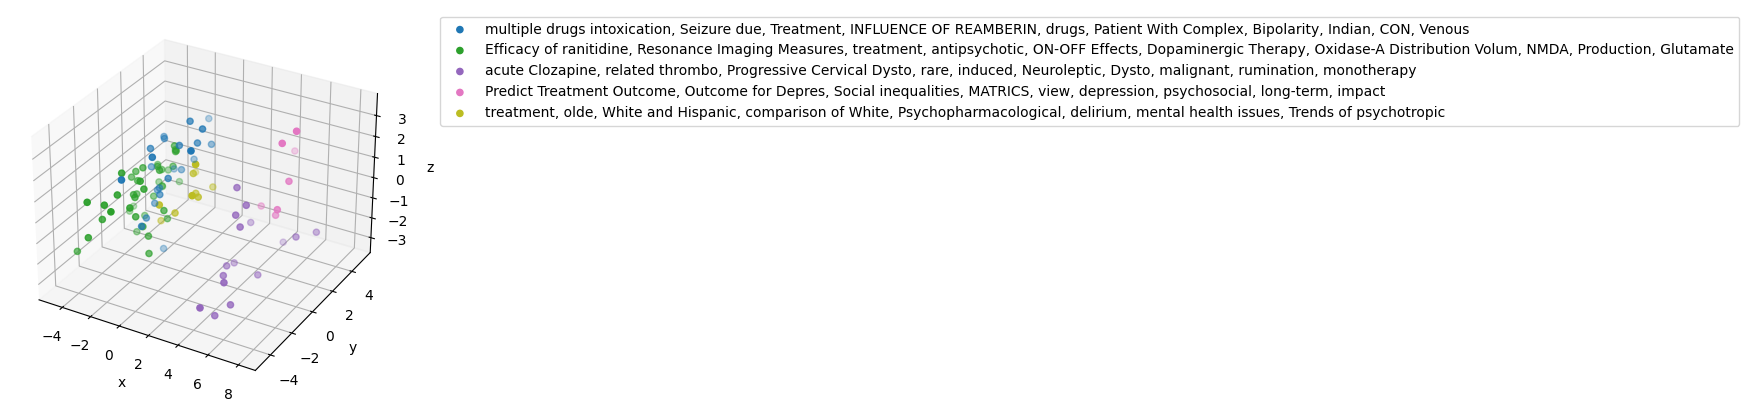

In [45]:
#%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')
cmap = plt.get_cmap("tab20")

# Plot each sample category individually such that we can set label name.
for i, cat in enumerate(df['cluster_label'].unique()):
    sub_matrix = np.array(df[df["cluster_label"] == cat]["embed_vis"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    z=sub_matrix[:, 2]
    colors = [cmap(i/len(df['cluster_label'].unique()))] * len(sub_matrix)
    ax.scatter(x, y, zs=z, zdir='z', c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(bbox_to_anchor=(1.1, 1))


In [48]:
import plotly.express as px

df[['x1', 'x2', 'x3']] = pd.DataFrame(df["embed_vis"].to_list())

fig = px.scatter_3d(df, x='x1', y='x2', z='x3', hover_data=['title'], color='cluster_label', opacity=0.5)
fig.update_layout(
    autosize=False,
    width=2000,
    height=1000,)

fig.show()

In [49]:
fig.write_html("./LSR_embeddings.html")


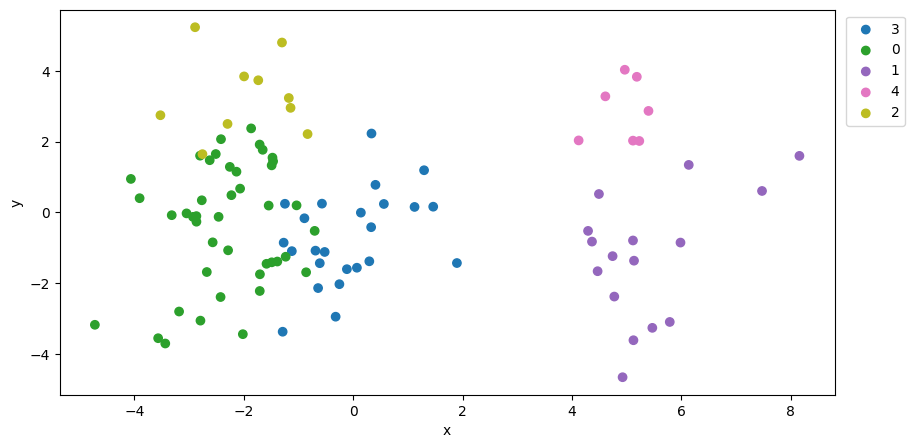

In [50]:
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(df['scibert_embeddings_alltext'].tolist())
df["embed_vis2"] = vis_dims.tolist()


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot()
cmap = plt.get_cmap("tab20")

# Plot each sample category individually such that we can set label name.
for i, cat in enumerate(df['clusterid'].unique()):
    sub_matrix = np.array(df[df["clusterid"] == cat]["embed_vis"].to_list())
    x=sub_matrix[:, 0]
    y=sub_matrix[:, 1]
    colors = [cmap(i/len(df['clusterid'].unique()))] * len(sub_matrix)
    ax.scatter(x, y, c=colors, label=cat)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(bbox_to_anchor=(1.1, 1))
